# CS485 - Data Science and Applications

  **Homework 2**

  Feel free to ignore the already implemented code and use your own.

## **Multiple Linear Regression Using Gradient Descent**
The goal of this exercise is to train a linear regression model using **many features simultaneously** and implement **gradient descent** to minimize the Mean Squared Error (MSE).

---

## **Step 1: Load the Data**
1. Extract all **feature columns** and the **target column**.
2. Print the shape of `X` (features) and `y` (target).

In [56]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/lpoly/public_data/main/car_data.csv'

# Load data from CSV
df = pd.read_csv(url)

# Extract features (all columns except the last one) and target (last column)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (392, 3)
Shape of y: (392,)


Mean Squared Logarithmic Error (MSLE) measures the **log difference** between predicted and actual values.
$$
\text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + y_i) - \log(1 + \hat{y}_i) \right)^2
$$

Where:
- $ y_i $ is the actual target value.
- $ \hat{y}_i = wX + b $ is the predicted value.
- The **log transformation** reduces the impact of large errors for high values.


## **Step 2: Define the MSLE Loss Function**

1. Implement the **Mean Squared Logarithmic Error (MSLE)** function.This function should take `w` (weights), `b` (bias), `X` (features), and `y` (target)

2. Initialize the weights and bias.
3. Test the MSLE with the initial values.


In [57]:
def msle_loss(w, b, X, y):
    y_pred = X.dot(w) + b
    return np.mean((np.log1p(y_pred) - np.log1p(y))**2)

# Initialize weights and bias
w_initial = np.zeros(X.shape[1])
b_initial = 0.0

# Test MSLE
initial_loss = msle_loss(w_initial, b_initial, X, y)
print("Initial MSLE:", initial_loss)

Initial MSLE: 5.610863345383772


## Step 3: Analytically derivate the Loss Function
1. Derive the gradient formulas for MSLE.
2. Implement a Python function `gradient_msle` that computes the **partial derivatives** with respect to `w` and `b`.
3. Test the function with initial values.


*Write some Markdown code here to get the derivative.*

In [58]:
def gradient_msle(w, b, X, y):
    n = X.shape[0]
    y_pred = X.dot(w) + b
    error = (np.log1p(y_pred) - np.log1p(y)) / (y_pred + 1)
    dw = (2/n) * X.T.dot(error)
    db = (2/n) * np.sum(error)
    return dw, db

# Test gradient
dw, db = gradient_msle(w_initial, b_initial, X, y)
print("Gradient (dw):", dw)
print("Gradient (db):", db)

Gradient (dw): [  -471.39563622  -6139.91026924 -14077.1277631 ]
Gradient (db): -4.697923131653272


## **Step 4: Standardization**
1. Compute the **mean** and **standard deviation** of each feature.
2. Standardize the feature matrix \(X\) using:
   $$
   X_{\text{standardized}} = \frac{X - \mu}{s}
   $$
3. Print the **mean** and **standard deviation** after transformation to verify standardization.


In [59]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_std = (X - mu) / sigma

print("Post-standardization mean:", np.mean(X_std, axis=0))
print("Post-standardization std:", np.std(X_std, axis=0))

Post-standardization mean: [-1.67666334e-16  1.35945676e-17  1.22351109e-16]
Post-standardization std: [1. 1. 1.]


## **Step 5: Implement Gradient Descent**
1. Implement a `gradient_descent` or a `momentum_gradient_descent` function to **iteratively update weights and bias** using MSLE.
2. Run it for **500 iterations** with $\tau$ = 0.5.
3. Store the loss at each step for visualization.

In [60]:
def gradient_descent(X, y, lr, iterations):
    w = np.zeros(X.shape[1])
    b = 0.0
    loss_history = []
    for _ in range(iterations):
        loss = msle_loss(w, b, X, y)
        loss_history.append(loss)
        dw, db = gradient_msle(w, b, X, y)
        w -= lr * dw
        b -= lr * db
    return w, b, loss_history

# Train
w_gd, b_gd, losses = gradient_descent(X_std, y, lr=0.5, iterations=500)
print("GD Weights:", w_gd)
print("GD Bias:", b_gd)

GD Weights: [-0.48720464 -1.26884923 -0.69581119]
GD Bias: 9.723402143027473


## **Step 6: Plot the Loss Curve**
1. Plot the loss (MSLE) over **iterations**.
2. Observe whether the model is converging.

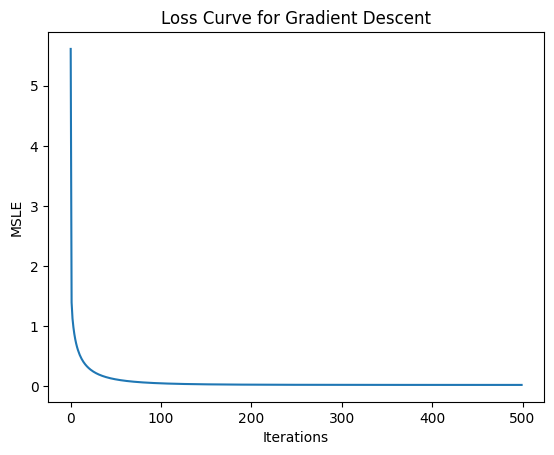

In [61]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSLE")
plt.title("Loss Curve for Gradient Descent")
plt.show()

## **Step 7: Unstandardization of the Model**
1. Since we trained on **standardized features**, we must **convert** the model parameters back to the **original scale**.
2. The original linear regression equation is:
   $$
   y = w_{\text{standardized}} X_{\text{standardized}} + b_{\text{standardized}}
   $$
   We need to convert it back to:
   $$
   y = w_{\text{original}} X_{\text{original}} + b_{\text{original}}
   $$
3. Use the following transformations:
   - **Weights:**
     $$
     w_{\text{original}} = \frac{w_{\text{standardized}}}{\sigma}
     $$
   - **Bias:**
     $$
     b_{\text{original}} = b_{\text{standardized}} - \sum \left( \frac{w_{\text{standardized}} \cdot \mu}{\sigma} \right)
     $$
4. Print the **converted weights and bias** and compare with the standardized values.
5. Discuss: When should we **keep using standardized features** vs. when to **convert back to the original scale**?


In [62]:
w_original = w_gd / sigma
b_original = b_gd - np.dot(w_gd, mu / sigma)

print("Original Scale Weights:", w_original)
print("Original Scale Bias:", b_original)

Original Scale Weights: [-0.01267375 -0.00329752 -0.00040628]
Original Scale Bias: 16.795430535590615


## **Step 8: Solve Linear Regression Using the Least Squares Solution**
1. Solve the linear regression problem using the **closed-form Least Squares solution**:
   $$
   (X^T X)w_{\text{LS}} = X^T y
   $$
   $$
   b_{\text{LS}} = \text{mean}(y) - w_{\text{LS}} \cdot \text{mean}(X)
   $$
2. Compare the weights and bias with those obtained from **gradient descent**.
3. Why do you think gradient descent yields different weights ?

In [63]:
# Add bias column (1s) to X_std
X_bias = np.hstack((X_std, np.ones((X_std.shape[0], 1))))

# Least squares formula
w_ls = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
w_ls_weights = w_ls[:-1]
w_ls_bias = w_ls[-1]

print("Least Squares Weights:", w_ls_weights)
print("Least Squares Bias:", w_ls_bias)

Least Squares Weights: [-0.68166133 -1.93006782 -0.2553734 ]
Least Squares Bias: 9.967627551020405


## **Step 9: Compare with Built-in Linear Regression**
1. Use **scikit-learn’s** built-in [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fit the model on **standardized features**.
2. Extract the learned **weights and bias**.
3. Compare the results with:
   - **Gradient Descent**
   - **Least Squares Solution**

In [64]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model using scikit-learn
model = LinearRegression()
model.fit(X_std, y)  # Use standardized features

# Extract weights and bias
sklearn_weights = model.coef_
sklearn_bias = model.intercept_

# Display results
print("Scikit-learn Weights:", sklearn_weights)
print("Scikit-learn Bias:", sklearn_bias)

# Compare with Gradient Descent & Least Squares
print("\nComparison:")
print("Method\t\t\tWeights (avg)\tBias")
print(f"Gradient Descent\t{np.mean(w_gd):.4f}\t\t{b_gd:.4f}")
print(f"Least Squares\t\t{np.mean(w_ls_weights):.4f}\t\t{w_ls_bias:.4f}")
print(f"Scikit-learn\t\t{np.mean(sklearn_weights):.4f}\t\t{sklearn_bias:.4f}")

Scikit-learn Weights: [-0.68166133 -1.93006782 -0.2553734 ]
Scikit-learn Bias: 9.967627551020408

Comparison:
Method			Weights (avg)	Bias
Gradient Descent	-0.8173		9.7234
Least Squares		-0.9557		9.9676
Scikit-learn		-0.9557		9.9676


## **Step 10: Retrain**
1. Retrain the model by minimizing MSE instead of the MSLE.
2. Run it for **500 iterations** with $\tau$ = 0.1.
3. What do you observe ? Why do you think that happens ?


MSE Weights: [1.7116279]
MSE Bias: 7.029097381152229
Final MSE Loss: 0.9924386487246482


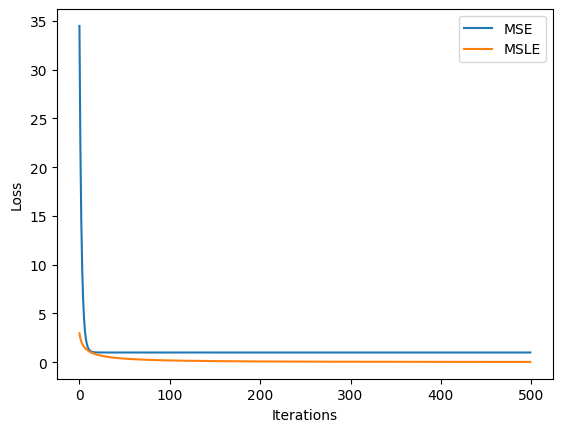

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, lr=0.01, iterations=1000, loss_fn=None, grad_fn=None):
    n_features = X.shape[1]
    w = np.zeros(n_features)
    b = 0
    losses = []

    for _ in range(iterations):
        dw, db = grad_fn(w, b, X, y)
        w -= lr * dw
        b -= lr * db
        loss = loss_fn(w, b, X, y)
        losses.append(loss)

    return w, b, losses

# Define MSE loss and gradient functions
def mse_loss(w, b, X, y):
    y_pred = X.dot(w) + b
    return np.mean((y_pred - y)**2)

def gradient_mse(w, b, X, y):
    n = X.shape[0]
    y_pred = X.dot(w) + b
    error = y_pred - y
    dw = (2/n) * X.T.dot(error)
    db = (2/n) * np.sum(error)
    return dw, db


# Example data creation for testing
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = y.flatten()

w_mse, b_mse, mse_losses = gradient_descent(
    X_std, y,
    lr=0.1,
    iterations=500,
    loss_fn=mse_loss,
    grad_fn=gradient_mse
)

# Display results
print("MSE Weights:", w_mse)
print("MSE Bias:", b_mse)
print("Final MSE Loss:", mse_losses[-1])

# Example of MSLE 
def msle_loss(w, b, X, y):
    y_pred = X.dot(w) + b
    return np.mean((np.log1p(y_pred) - np.log1p(y))**2)

def gradient_msle(w, b, X, y):
    y_pred = X.dot(w) + b
    n = X.shape[0]
    error = (np.log1p(y_pred) - np.log1p(y))
    dw = (2/n) * X.T.dot(error / (y_pred + 1))
    db = (2/n) * np.sum(error / (y_pred + 1))
    return dw, db

w_msle, b_msle, msle_losses = gradient_descent(
    X_std, y,
    lr=0.1,
    iterations=500,
    loss_fn=msle_loss,
    grad_fn=gradient_msle
)

# Plot 
plt.plot(mse_losses, label='MSE')
plt.plot(msle_losses, label='MSLE')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

*Write an explanation on question 3: What do you observe ? Why do you think that happens ?*

gradient descent is an iterative method it starts with a guess and adjusts step by step its results depend on settings like learning rate or initial weights least squares gives a direct math solution but needs clean data built-in tools like scikit-learn use optimized methods to handle messy data better this is why gradient descent might give slightly different answers compared to exact or polished methods